In [ ]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the cleaned data after preprocessing.
df = pd.read_csv("C:/Users/KRISHNA/Desktop/SHWETA/Fall 2024/ENGR_5520G_G5/Cleaned_Loan_approval_dataset.csv")

In [4]:
df.head()

,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,UseOfLoan,...,ExpectedReturn,ProbabilityOfDefault,Rating,Restructured,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,TotalIncome,TotalLiabilities
0,Existing_credit_customer,Income_expenses_verified,1,53,Female,EE,2125.0,2125.0,20.97,Home_improvement,...,0.141145,0.122216,C,No,M,1000.0,1.0,500.0,354.0,499.09
1,Existing_credit_customer,Income_unverified,1,50,Female,EE,3000.0,3000.0,17.12,Business,...,0.140436,0.036400,B,No,M,1000.0,1.0,1800.0,900.0,740.45
2,New_credit_Customer,Income_expenses_verified,1,44,Male,EE,10630.0,9100.0,13.67,Business,...,0.113484,0.041300,A,No,M,1000.0,0.0,0.0,1200.0,915.00
3,New_credit_Customer,Income_verified,6,42,Male,ES,1500.0,1500.0,40.40,Home_improvement,...,0.183229,0.188726,F,No,M3,1000.0,0.0,0.0,863.0,351.00
4,New_credit_Customer,Income_expenses_verified,6,34,Female,ES,1595.0,1090.0,68.39,Other,...,0.115240,0.749511,HR,No,M5,1000.0,0.0,0.0,697.0,947.00


In [5]:
df.columns

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'AppliedAmount', 'Amount', 'Interest', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'DebtToIncome', 'FreeCash', 'ExpectedReturn',
       'ProbabilityOfDefault', 'Rating', 'Restructured', 'CreditScoreEsMicroL',
       'CreditScoreEeMini', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'TotalIncome', 'TotalLiabilities'],
      dtype='object')

In [6]:
df['ProbabilityOfDefault'].describe()

count    179235.000000
mean          0.231987
std           0.139558
min           0.000000
25%           0.124240
50%           0.209589
75%           0.318264
max           0.994429
Name: ProbabilityOfDefault, dtype: float64

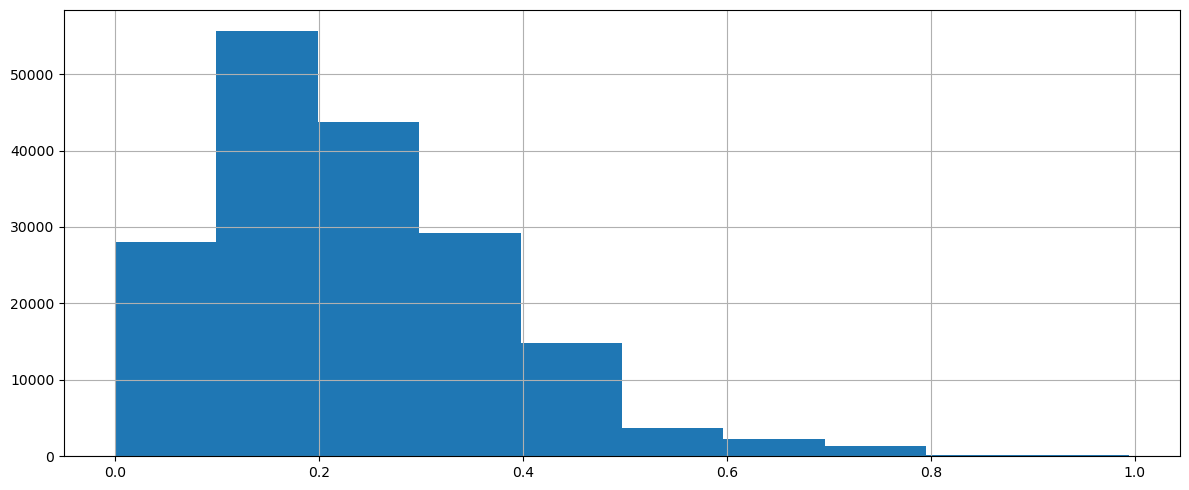

In [7]:
df['ProbabilityOfDefault'].hist(figsize=(12, 5), bins=10)
plt.tight_layout()
plt.show()

In [8]:
# Selecting features for predicting probabilty of default.
default_prob_features = [
    'AppliedAmount', 'Amount','ProbabilityOfDefault',
    'UseOfLoan', 'TotalLiabilities','TotalIncome',
    'DebtToIncome', 'FreeCash',
    'NewCreditCustomer', 'CreditScoreEsMicroL', 'CreditScoreEeMini',
    'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
    'Age', 'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'HomeOwnershipType',
    'Rating', 'Restructured'
]
default_prob_df= df[default_prob_features]
default_prob_df.head()

,AppliedAmount,Amount,ProbabilityOfDefault,UseOfLoan,TotalLiabilities,TotalIncome,DebtToIncome,FreeCash,NewCreditCustomer,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,Age,EmploymentStatus,EmploymentDurationCurrentEmployer,HomeOwnershipType,Rating,Restructured
0,2125.0,2125.0,0.122216,Home_improvement,499.09,354.0,26.29,10.92,Existing_credit_customer,M,1000.0,1.0,500.0,53,Retiree,Not-known,Owner,C,No
1,3000.0,3000.0,0.036400,Business,740.45,900.0,30.58,78.80,Existing_credit_customer,M,1000.0,1.0,1800.0,50,Entrepreneur,MoreThan5Years,Owner,B,No
2,10630.0,9100.0,0.041300,Business,915.00,1200.0,26.71,349.43,New_credit_Customer,M,1000.0,0.0,0.0,44,Entrepreneur,UpTo3Years,Mortgage,A,No
3,1500.0,1500.0,0.188726,Home_improvement,351.00,863.0,7.36,449.47,New_credit_Customer,M3,1000.0,0.0,0.0,42,Fully-Employed,UpTo5Years,Living_with_parents,F,No
4,1595.0,1090.0,0.749511,Other,947.00,697.0,36.04,95.81,New_credit_Customer,M5,1000.0,0.0,0.0,34,Retiree,Not-known,Tenant_pre_furnished_property,HR,No


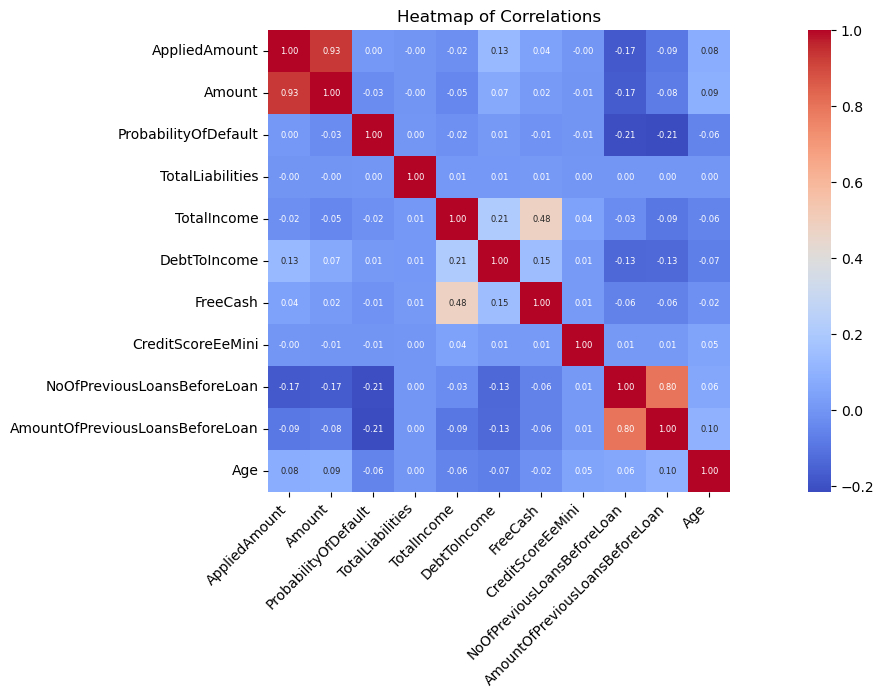

In [9]:
# Analysing the heatmap to find out relationships between the variables.

df1 = default_prob_df.select_dtypes(include=['number'])
# Calculating correlation matrix
correlation_matrix = df1.corr()

# Creating heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6},fmt=".2f", square=True)
plt.title('Heatmap of Correlations')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  
plt.show()

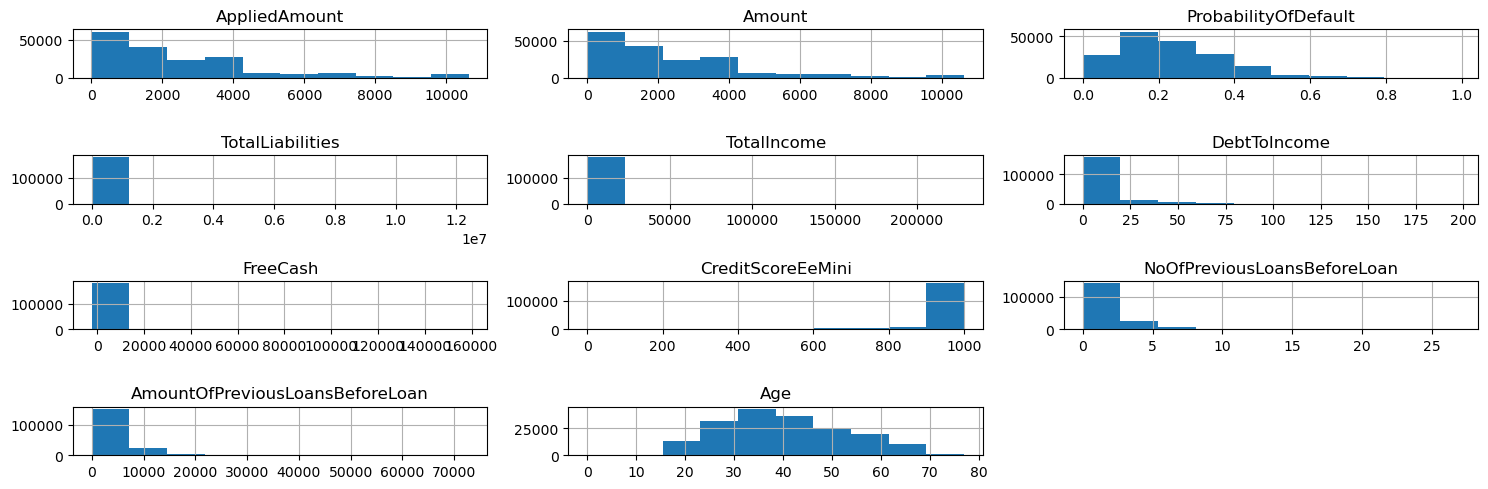

In [10]:
# Plotting histograms for all numerical variables to check the distribution of the variables.
df1.hist(figsize=(15, 5), bins=10)
plt.tight_layout()
plt.show()

In [11]:
import joblib

label_encoders = joblib.load('C:/Users/KRISHNA/Desktop/SHWETA/Fall 2024/ENGR_5520G_G5/label_encoders.pkl')

# Getting the categorical columns.
categorical_columns = default_prob_df.select_dtypes(include=['object']).columns.tolist()

# Encoding the categorical columns.
for column in categorical_columns:
    if column in label_encoders:
        encoder = label_encoders[column]
        default_prob_df[column] = encoder.transform(default_prob_df[column])  

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_11104\501276320.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_prob_df[column] = encoder.transform(default_prob_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_11104\501276320.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_prob_df[column] = encoder.transform(default_prob_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_11104\501276320.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

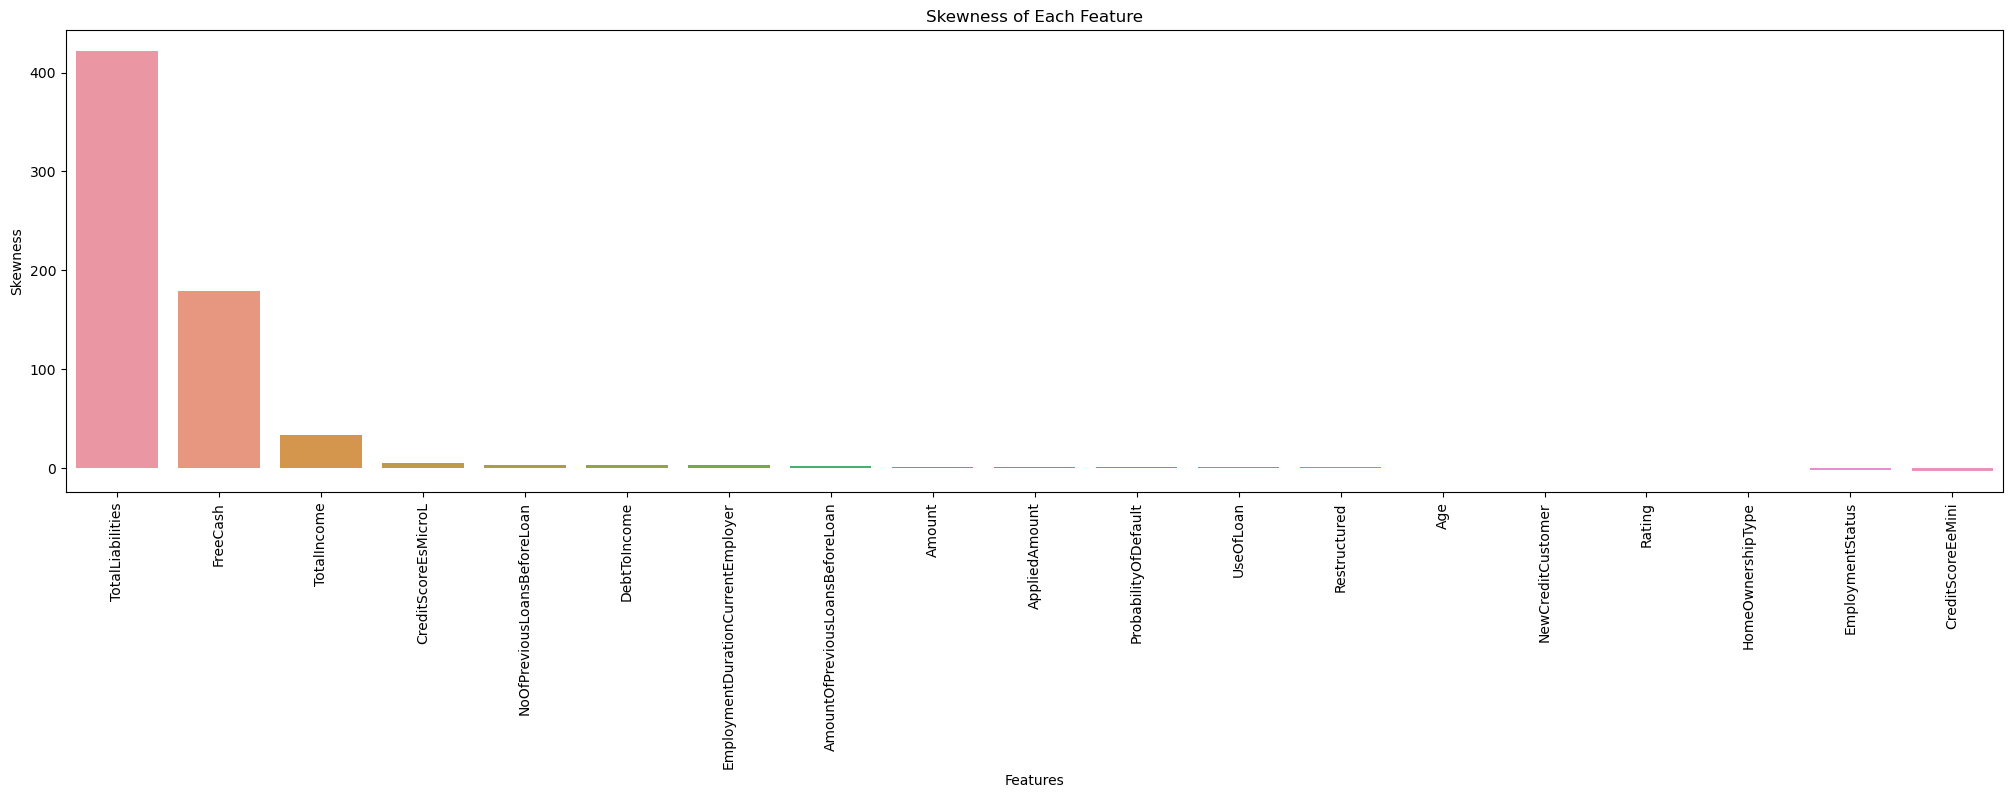

In [12]:
# Checking skewness of all the columns.
skewed_features = default_prob_df.apply(lambda x: x.skew()).sort_values(ascending=False)

# Plotting the skewness values
plt.figure(figsize=(25, 6))
sns.barplot(x=skewed_features.index, y=skewed_features.values)
plt.xticks(rotation=90) 
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.show()

In [13]:
default_prob_df.head()

,AppliedAmount,Amount,ProbabilityOfDefault,UseOfLoan,TotalLiabilities,TotalIncome,DebtToIncome,FreeCash,NewCreditCustomer,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,Age,EmploymentStatus,EmploymentDurationCurrentEmployer,HomeOwnershipType,Rating,Restructured
0,2125.0,2125.0,0.122216,7,499.09,354.0,26.29,10.92,0,0,1000.0,1.0,500.0,53,3,1,7,3,0
1,3000.0,3000.0,0.036400,3,740.45,900.0,30.58,78.80,0,0,1000.0,1.0,1800.0,50,0,0,7,2,0
2,10630.0,9100.0,0.041300,3,915.00,1200.0,26.71,349.43,1,0,1000.0,0.0,0.0,44,0,6,5,0,0
3,1500.0,1500.0,0.188726,7,351.00,863.0,7.36,449.47,1,4,1000.0,0.0,0.0,42,1,8,4,6,0
4,1595.0,1090.0,0.749511,10,947.00,697.0,36.04,95.81,1,6,1000.0,0.0,0.0,34,3,1,9,7,0


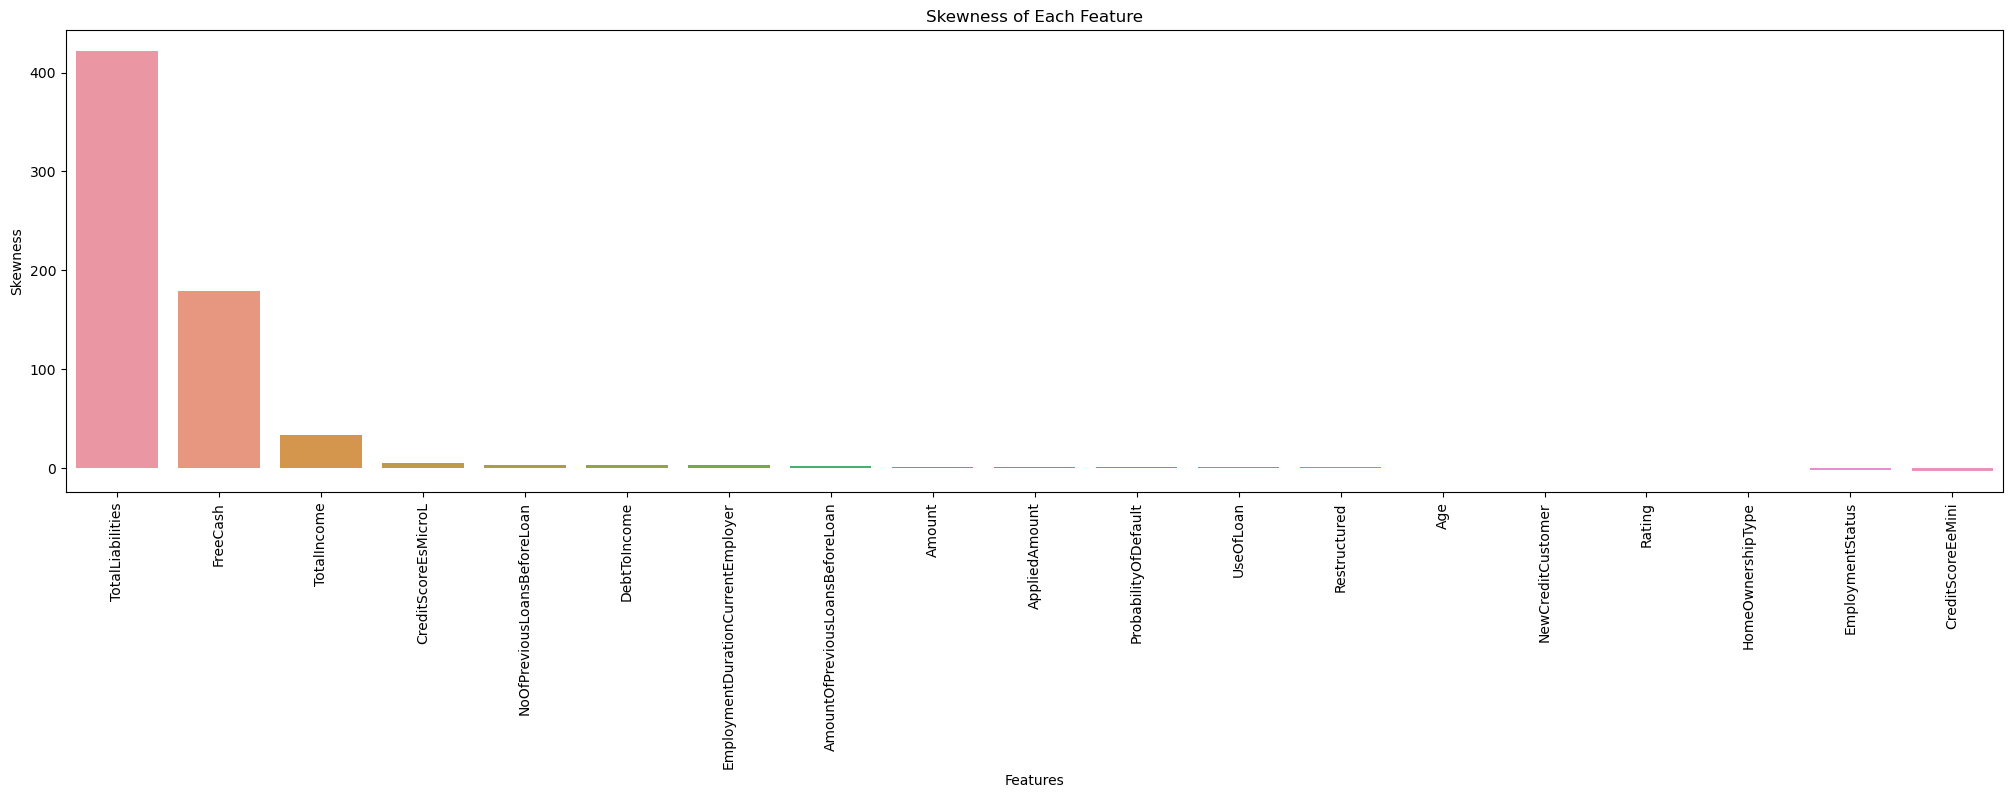

In [14]:
# Checking skewness of all the columns.
skewed_features = default_prob_df.apply(lambda x: x.skew()).sort_values(ascending=False)

# Plotting the skewness values
plt.figure(figsize=(25, 6))
sns.barplot(x=skewed_features.index, y=skewed_features.values)
plt.xticks(rotation=90) 
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.show()

In [15]:
threshold = 2

# Selecting features to transform based on skewness
features_to_transform = skewed_features[skewed_features.abs() > threshold].index.tolist()

# Apply transformations
for column in features_to_transform:
    if skewed_features[column] > 0:
        if (default_prob_df[column] >= 0).all(): 
            default_prob_df[column] = np.log1p(default_prob_df[column])
        else:
            min_value = default_prob_df[column].min()
            default_prob_df[column] = default_prob_df[column] + abs(min_value) + 1 
            default_prob_df[column] = np.log1p(default_prob_df[column])

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_11104\2646084256.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_prob_df[column] = np.log1p(default_prob_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_11104\2646084256.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_prob_df[column] = default_prob_df[column] + abs(min_value) + 1
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_11104\2646084256.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [16]:
features_to_transform

['TotalLiabilities',
 'FreeCash',
 'TotalIncome',
 'CreditScoreEsMicroL',
 'NoOfPreviousLoansBeforeLoan',
 'DebtToIncome',
 'EmploymentDurationCurrentEmployer',
 'AmountOfPreviousLoansBeforeLoan',
 'CreditScoreEeMini']

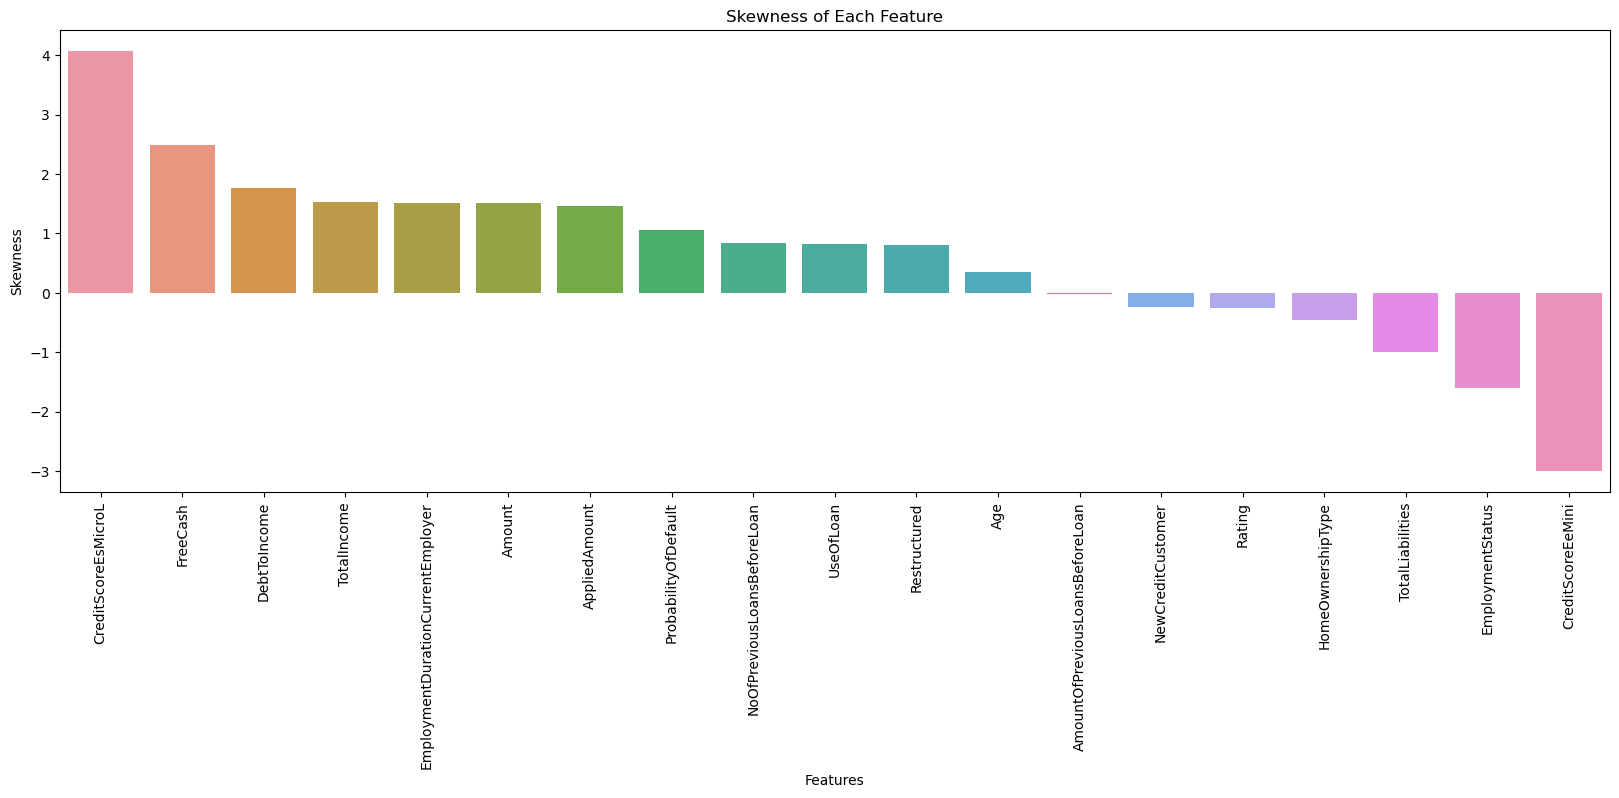

In [17]:
# Checking the skewness of each column after perfroming the transformations.
skewed_features = default_prob_df.apply(lambda x: x.skew()).sort_values(ascending=False)

# Plotting the skewness values.
plt.figure(figsize=(20, 6))
sns.barplot(x=skewed_features.index, y=skewed_features.values)
plt.xticks(rotation=90)  
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.show()

In [18]:
# Saving the data.
default_prob_df.to_csv('Cleaned_probability_default_dataset.csv', index=False)

In [ ]:
# Performing normalization of data using Robust Scaler.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = default_prob_df.drop('ProbabilityOfDefault',axis=1) 
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = default_prob_df[['ProbabilityOfDefault']] 
y = scaler.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


importances = model.feature_importances_

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

In [ ]:
# Plotting the top 20 feature importances.
top_n = 20
top_features = feature_importance_df.head(top_n)
plt.figure(figsize=(12, 5))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=45) 
plt.show()